<a href="https://colab.research.google.com/github/sugi-san/stylegan2/blob/master/generate_anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

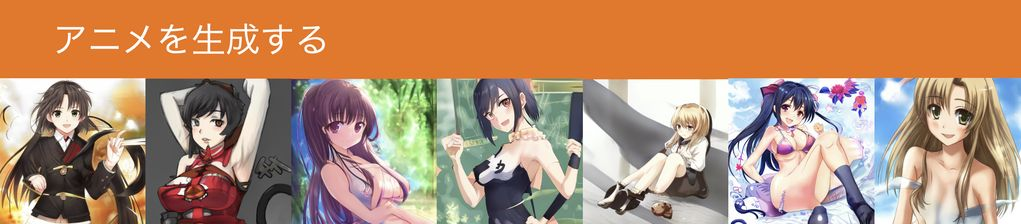

In [ ]:
#@title 1.セットアップ（２分くらい掛かります）
from IPython.utils import io
import os
import subprocess
import tqdm.notebook

TQDM_BAR_FORMAT = '{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]'

try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:

      # github からコードをコピー
      !git clone https://github.com/sugi-san/stylegan2.git
      pbar.update(10)

      # 学習済みの重みのダウンロード
      ! pip install --upgrade gdown
      import gdown
      gdown.download('https://drive.google.com/u/1/uc?id=1_NUX9_xRGjce1KbCxT4frUsFWctlN4ZC', 'network-tadne.pkl', quiet=False)
      pbar.update(20)

      # TensorFlow_plugin セッティングと関数定義
      %tensorflow_version 1.x
      %cd /content/stylegan2
      from function import *
      pbar.update(70)

except subprocess.CalledProcessError:
  print(captured)
  raise

# サンプルseed
pt_list = [1058, 1077, 1106, 1111, 1123, 1140, 1174, 1176, 1182, 1187, 1190, 1201, 1305, 1416, 1417, 1426, 1607, 1613, 1652, 1679, 1685, 1777, 1779, 1863, 1895, 2550, 2967, 3158, 3160, 3210, 3211, 3304, 3313, 3330, 3349, 3365, 3489, 3564, 3617, 3618, 3649, 3772, 3865, 3870, 3923, 3988, 4086, 4087, 4094, 4096, 4143, 4170, 4234, 4263, 4264, 4283, 4288, 4316, 4327, 4337, 4345, 4470, 4473, 4484, 4494, 4640, 4674, 4707, 4756, 4786, 4798, 4804, 4868, 4956, 5013, 5031, 5036, 5137, 5167, 5181, 5183, 5231, 5342, 5526, 5631, 5648, 5658, 5666, 5708, 5725, 5782, 5805, 5807, 5877, 5958, 5997, 6017, 6024, 6043, 6103, 6281, 6375, 6478, 6498, 6651, 6718, 7000, 7013, 7017, 7018, 7079, 7086, 7094, 7095, 7168, 7208, 7262, 7281, 7285, 7302, 7314, 7332, 7342, 7399, 7413, 7419, 7424, 7453, 7536, 7537, 7552, 7561, 7587, 7591, 7701, 7705, 7708, 7768, 7816, 7854, 7857, 7858, 7882, 7914, 7917, 7918, 7929, 8003, 8005, 8020, 8086, 8090, 8102, 8114, 8129, 8133, 8137, 8140, 8144, 8152, 8159, 8170, 8172, 8377, 8401, 8407, 8434, 8450, 8460, 8462, 8470, 8482, 8502, 8616, 8617, 8728, 8908, 8916, 8940, 8944, 8947, 8965]

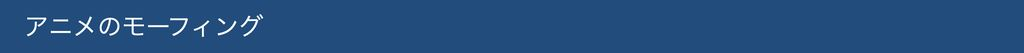

In [ ]:
#@title 2.アニメの生成
start = 5300 #@param {type:"slider", min:1000, max:9950, step:50}  
number = 10 #@param {type:"slider", min:5, max:50, step:1} 
seeds = list(range(start, start+number))

reset_folder('gen_img')
truncation_psi = 0.8 
generate_images(seeds, truncation_psi)
display_pic('gen_img')

In [ ]:
#@title 3.モーフィング 
input_A =   5302#@param {type:"integer"}
input_B =  5304 #@param {type:"integer"}
truncation_psi = 0.8 
duration_sec = 5.0 
mp4_fps = 20

#generate_images([src_seed, dst_seed], truncation_psi)
output_filename = interpolate_between_seeds(seed_array=[input_A, input_B], truncation=truncation_psi, duration_sec=duration_sec, mp4_fps=mp4_fps)
display_mp4(output_filename)

In [ ]:
#@title 4.動画の作成
import random
#@markdown ・手動設定の場合はmanualにチェックを入れ、inputに半角数字をカンマ区切りで入力する
manual = False #@param {type:"boolean"}
input = '7561, 7424, 5167, 4640, 3923' #@param {type:"string"}

if manual==True:
  seeds = [int(x.strip()) for x in input.split(',')]
  duration_sec = len(seeds)*2.5
else:
  num = 8
  idx_list = random.sample(range(182), k=num)
  seeds = []
  for i in idx_list:
      seeds.append(pt_list[i])
  duration_sec = num*2.5

mp4_fps = 20
output_filename = interpolate_between_seeds(seed_array=seeds, truncation=truncation_psi, duration_sec=duration_sec, mp4_fps=mp4_fps, text=False)
display_mp4(output_filename)

In [ ]:
#@title 5.動画のダウンロード
from google.colab import files
files.download('interp.mp4')

###【備考】
・ブラウザは、必ずGoogle Chromeを使用して下さい。

・動作がおかしくなった場合の対応\
１）グーグルクロームの該当タブを削除して接続を切る\
２）再度リンクを開く\
３）右上にある「ランタイム／ランタイムを出荷時設定にリセット」をクリックする（下記写真を参照に下さい）\
４）あとは、動画にある通りの操作をすればOK

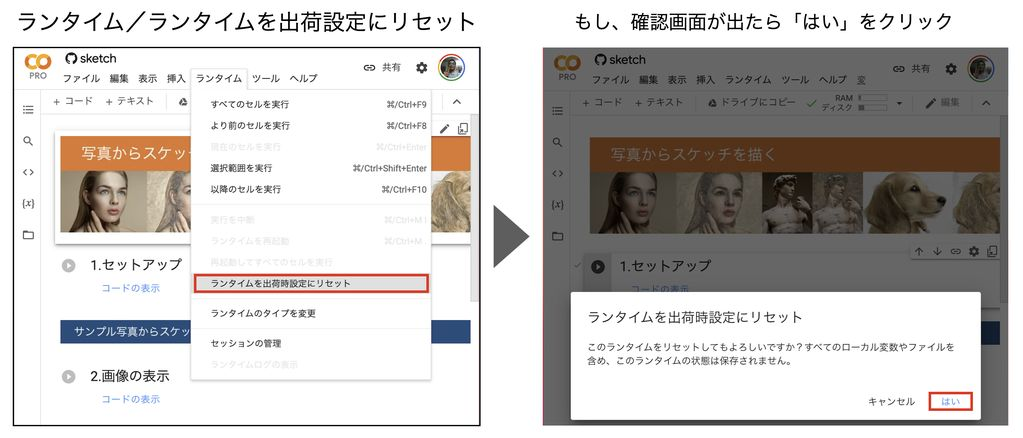